In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc, classification_report

import warnings
warnings.filterwarnings("ignore")

# Loading Data


In [90]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [91]:
# checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [92]:
# check NaN value 
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [93]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# Preprocessing Data

In [94]:
print(df.shape)
df.head()

(373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [95]:
#df = df[df['Visit'] == 1]
#df.reset_index(drop=True, inplace=True)
ind = df[df.Group=='Converted'].index
df = df.drop(ind,axis=0)
df.reset_index(drop=True,inplace=True)

In [96]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
332,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
333,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
334,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [97]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Nondemented','Demented'], [0,1])
df['M/F'] = df['M/F'].replace(['M','F'], [1,0])
df = df.drop(['MRI ID', 'Visit', 'Hand', 'MR Delay'], axis=1)
df.head()

,Subject ID,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,0,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,1,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,1,1,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [98]:
# bar drawing function

def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 0, 'Gender and Dement rate')

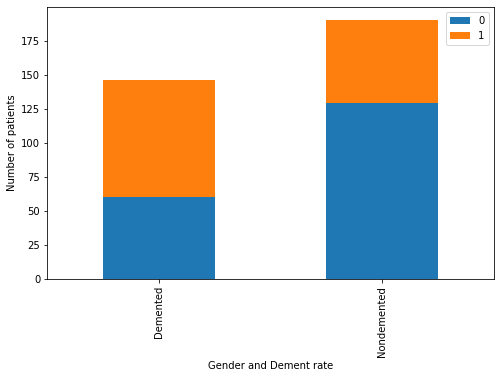

In [99]:
bar_chart('M/F')
plt.ylabel('Number of patients')
plt.legend()
plt.xlabel('Gender and Dement rate')

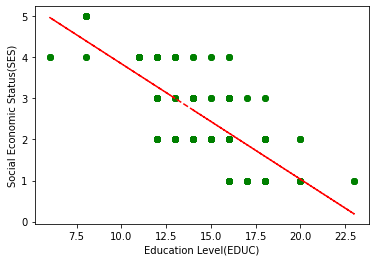

In [100]:
# Replace Nan

x = df['EDUC']
y = df['SES']
not_index = y[~y.isnull()].index
x = x[not_index]
y = y[not_index]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')
plt.show()

In [101]:
# Fillna NaN
df['SES'].fillna(df.groupby('EDUC')['SES'].transform('median'),inplace = True)
df['MMSE'].fillna(df['MMSE'].mean(),inplace = True)
print(df.shape)

(336, 11)


In [102]:
df.head()

,Subject ID,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,0,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,1,1,75,12,4.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,1,1,76,12,4.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,1,1,80,12,4.0,22.0,0.5,1698,0.701,1.034


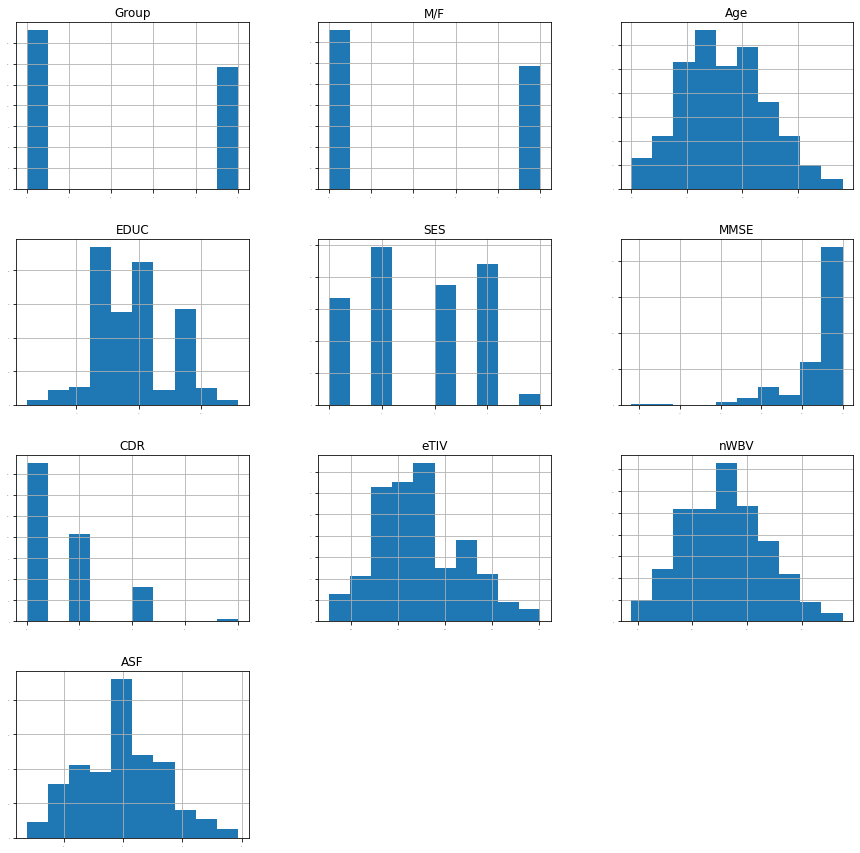

In [103]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, ax=ax)
plt.show()

In [104]:
cor = df.corr(method='pearson')

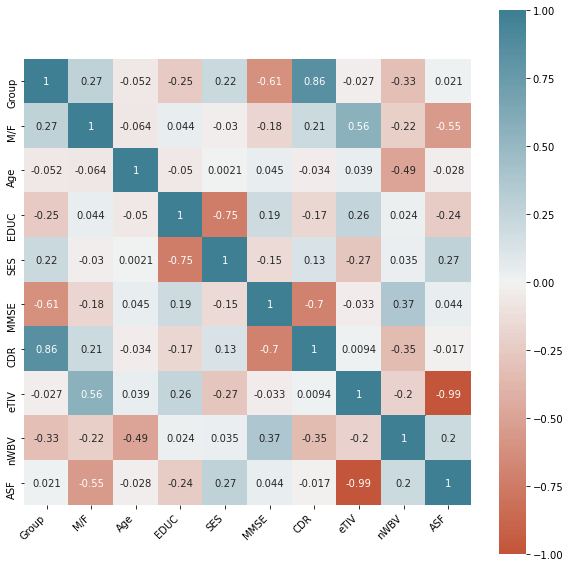

In [105]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Train, test split

In [106]:
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV','ASF']]
Y = df['Group'].values

# splitting into three sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2,random_state=42)

# Feature scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
X_train.shape, X_test.shape

((268, 8), (68, 8))

# Modeling

In [108]:
kfolds = 5
acc =[]

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc, classification_report
from sklearn.model_selection import GridSearchCV

In [110]:
# Logistic Regression 
best_score=0


for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_train, Y_train, cv=kfolds, scoring='accuracy') # Get recall for each parameter setting
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_train, Y_train)

test_score = SelectedLogRegModel.score(X_test, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)
m = 'Logistic Regression'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.813487071977638
Best parameter for regularization (C) is:  100
Test accuracy with best C parameter is 0.8970588235294118
Test recall with the best C parameter is 0.8666666666666667
Test AUC with the best C parameter is 0.893859649122807


In [111]:
#Decision Tree

best_score = 0

for md in range(1, 9):
   
    treeModel = DecisionTreeClassifier(random_state=42, max_depth=md, criterion='gini')

    scores = cross_val_score(treeModel, X_train, Y_train, cv=kfolds, scoring='accuracy')
    
    score = np.mean(scores)
    
    if score > best_score:
        best_score = score
        best_parameter = md

     
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_train, Y_train)

test_score = SelectedDTModel.score(X_test, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.8431865828092242
Best parameter for the maximum depth is:  5
Test accuracy with best parameter is  0.8529411764705882
Test recall with best parameters is  0.7666666666666667
Test AUC with the best parameter is  0.843859649122807


In [112]:
# Random Forest Classifier

best_score = 0

for M in range(2, 15, 2): 
    for d in range(1, 9): 
        for m in range(1, 7): 
          
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=42)

            scores = cross_val_score(forestModel, X_train, Y_train, cv=kfolds, scoring='accuracy')

            score = np.mean(scores)

            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

  
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=42).fit(X_train, Y_train)

PredictedOutput = SelectedRFModel.predict(X_test)
test_score = SelectedRFModel.score(X_test, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.86575821104123
Best parameters of M, d, m are:  10 1 6
Test accuracy with the best parameters is 0.9264705882352942
Test recall with the best parameters is: 0.9
Test AUC with the best parameters is: 0.9236842105263158


In [113]:
# Adaboost

best_score = 0

for M in range(2, 15, 2): 
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:

        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=42)

        scores = cross_val_score(boostModel, X_train, Y_train, cv=kfolds, scoring='accuracy')

        score = np.mean(scores)

        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr
    
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=42).fit(X_train, Y_train)

PredictedOutput = SelectedBoostModel.predict(X_test)
test_score = SelectedBoostModel.score(X_test, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter of M is: ", best_M)
print("best parameter of LR is: ", best_lr)
print("Test accuracy with the best parameter is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'AdaBoost'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.8359189378057301
Best parameter of M is:  4
best parameter of LR is:  1
Test accuracy with the best parameter is 0.9117647058823529
Test recall with the best parameters is: 0.9333333333333333
Test AUC with the best parameters is: 0.9140350877192983


In [114]:
#XGB

best_score =0

for eta in [0.005, 0.01, 0.05, 0.10, 0.15, 0.20 ]:
  for m in [ 1,2,3, 4, 5, 6, 8, 10, 12, 15]:
    for g in [0.0, 0.1, 0.2 , 0.3, 0.4 ]:

      XGB = XGBClassifier(max_depth=m,learning_rate=eta,random_state=42,gamma=g,
                          objective = 'binary:logistic', eval_metric = 'logloss'
                         )

      scores = cross_val_score(XGB, X_train, Y_train, cv=kfolds, scoring='accuracy')

      scores = np.mean(scores)

      if best_score < scores:
        best_score = scores
        best_eta = eta
        best_m = m
        best_g = g
SelectedXGB = XGBClassifier(max_depth=best_m, learning_rate=best_eta, random_state=42, gamma=best_g,
                            objective = 'binary:logistic', eval_metric = 'logloss' 
                            ).fit(X_train,Y_train)

PredictedOutput = SelectedXGB.predict(X_test)
test_score = SelectedXGB.score(X_test, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter of eta is: ", best_eta)
print("Best parameter of m is: ", best_m)
print("Best parameter of g is: ", best_g)
print("Test accuracy with the best parameter is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'XGB'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.8654786862334032
Best parameter of eta is:  0.05
Best parameter of m is:  10
Best parameter of g is:  0.4
Test accuracy with the best parameter is 0.9411764705882353
Test recall with the best parameters is: 0.9666666666666667
Test AUC with the best parameters is: 0.943859649122807


In [115]:
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Logistic Regression,0.897059,0.866667,0.893860
1,Decision Tree,0.852941,0.766667,0.843860
2,Random Forest,0.926471,0.900000,0.923684
3,AdaBoost,0.911765,0.933333,0.914035
4,XGB,0.941176,0.966667,0.943860


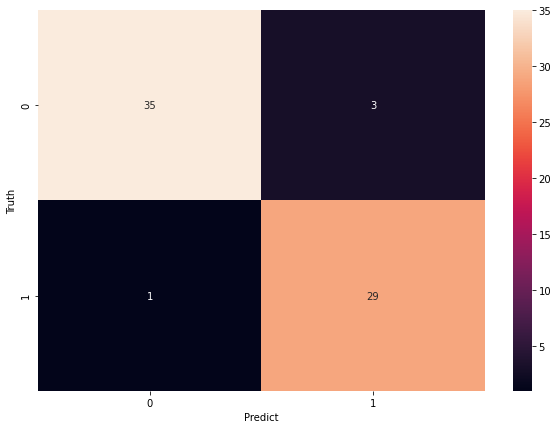

In [116]:
y_predicted = SelectedXGB.predict(X_test)
cm = confusion_matrix(Y_test, y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()

In [117]:
print(classification_report(Y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.91      0.97      0.94        30

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

